# Business Understanding

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Diminta untuk membuka potensi maksimal dari data perusahaan. Dengan melakukannya, dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman dapat diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression.

# DATASET

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load Dataset training
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Indonesia/application_train.csv')
data_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Load Dataset testing
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Indonesia/application_test.csv')
data_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Pre-Processing

In [ ]:
# Menampilkan deskripsi data statistik
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
# Menampilkan ukuran data dan informasi detail tentang dataset
N, P = data_train.shape
print('baris = ', N, ', Kolom = ', P)
 
data_train.info()

baris =  307511 , Kolom =  122
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
# Menampilkan data yang duplikat pada data train
data_train.duplicated().sum()

0

In [ ]:
# Menampilkan data yang duplikat pada data test
data_train.duplicated().sum()

0

In [ ]:
# Mengecek nama variabel pada data train
data_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [ ]:
train=data_train[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]

In [ ]:
test=data_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]

In [ ]:
# Cek kolom yang memiliki data null dan berapa jumlah data null setiap kolom data train
train.isnull().sum()

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
dtype: int64

In [ ]:
# Cek kolom yang memiliki data null dan berapa jumlah data null setiap kolom data test
test.isnull().sum()

NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    24
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE               911
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
dtype: int64

In [ ]:
# Drop kolom yang masih memiliki data null
train=train.dropna()
test=test.dropna()

In [ ]:
# Cek kembali kolom yang memiliki missing value pada data train
train.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
dtype: int64

In [ ]:
# Cek kembali kolom yang memiliki missing value pada data test
test.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
dtype: int64

In [ ]:
# Menampilkan ukuran data dan informasi detail tentang data train
N, P = train.shape
print('baris = ', N, ', Kolom = ', P)
 
train.info()

baris =  306207 , Kolom =  17
<class 'pandas.core.frame.DataFrame'>
Int64Index: 306207 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      306207 non-null  int64  
 1   NAME_CONTRACT_TYPE          306207 non-null  object 
 2   CODE_GENDER                 306207 non-null  object 
 3   FLAG_OWN_CAR                306207 non-null  object 
 4   FLAG_OWN_REALTY             306207 non-null  object 
 5   CNT_CHILDREN                306207 non-null  int64  
 6   AMT_INCOME_TOTAL            306207 non-null  float64
 7   AMT_CREDIT                  306207 non-null  float64
 8   AMT_ANNUITY                 306207 non-null  float64
 9   AMT_GOODS_PRICE             306207 non-null  float64
 10  NAME_TYPE_SUITE             306207 non-null  object 
 11  NAME_INCOME_TYPE            306207 non-null  object 
 12  NAME_EDUCATION_TYPE         306207 non-nul

In [ ]:
# Menampilkan ukuran data dan informasi detail tentang data test
N, P = test.shape
print('baris = ', N, ', Kolom = ', P)
 
test.info()

baris =  47809 , Kolom =  16
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 48743
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NAME_CONTRACT_TYPE          47809 non-null  object 
 1   CODE_GENDER                 47809 non-null  object 
 2   FLAG_OWN_CAR                47809 non-null  object 
 3   FLAG_OWN_REALTY             47809 non-null  object 
 4   CNT_CHILDREN                47809 non-null  int64  
 5   AMT_INCOME_TOTAL            47809 non-null  float64
 6   AMT_CREDIT                  47809 non-null  float64
 7   AMT_ANNUITY                 47809 non-null  float64
 8   AMT_GOODS_PRICE             47809 non-null  float64
 9   NAME_TYPE_SUITE             47809 non-null  object 
 10  NAME_INCOME_TYPE            47809 non-null  object 
 11  NAME_EDUCATION_TYPE         47809 non-null  object 
 12  NAME_FAMILY_STATUS          47809 non-null  object 
 13  NA

In [ ]:
# Mencari nilai uniq pada setiap variabel di data train
train.nunique()
    

TARGET                            2
NAME_CONTRACT_TYPE                2
CODE_GENDER                       3
FLAG_OWN_CAR                      2
FLAG_OWN_REALTY                   2
CNT_CHILDREN                     15
AMT_INCOME_TOTAL               2518
AMT_CREDIT                     5585
AMT_ANNUITY                   13655
AMT_GOODS_PRICE                 985
NAME_TYPE_SUITE                   7
NAME_INCOME_TYPE                  8
NAME_EDUCATION_TYPE               5
NAME_FAMILY_STATUS                5
NAME_HOUSING_TYPE                 6
REGION_POPULATION_RELATIVE       81
DAYS_BIRTH                    17458
dtype: int64

In [ ]:
# Mencari nilai uniq pada setiap variabel di data test
test.nunique()

NAME_CONTRACT_TYPE                2
CODE_GENDER                       2
FLAG_OWN_CAR                      2
FLAG_OWN_REALTY                   2
CNT_CHILDREN                     11
AMT_INCOME_TOTAL                599
AMT_CREDIT                     2912
AMT_ANNUITY                    7442
AMT_GOODS_PRICE                 671
NAME_TYPE_SUITE                   7
NAME_INCOME_TYPE                  7
NAME_EDUCATION_TYPE               5
NAME_FAMILY_STATUS                5
NAME_HOUSING_TYPE                 6
REGION_POPULATION_RELATIVE       81
DAYS_BIRTH                    15414
dtype: int64

Pada CODE_GENDER terdapat kategori XNA pada data train namun pada data test tidak ada maka akan dihapus

In [ ]:
# Menampilkan nilai uniq pada variabel CODE_GENDER
print(train.CODE_GENDER.value_counts())

F      201635
M      104568
XNA         4
Name: CODE_GENDER, dtype: int64


Pada NAME_INCOME_TYPE terdapat kategori Maternity leave pada data train namun pada data test tidak ada maka akan dihapus

In [ ]:
# Menampilkan nilai uniq pada variabel NAME_INCOME_TYPE
print(train.NAME_INCOME_TYPE.value_counts())

Working                 158126
Commercial associate     71254
Pensioner                55164
State servant            21609
Unemployed                  22
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


In [ ]:
# Drop data yang tidak tepat
train.drop(train.index[train['CODE_GENDER']=='XNA'],inplace=True)
train.drop(train.index[train['NAME_INCOME_TYPE']=='Maternity leave'],inplace=True)

In [ ]:
# Cek kembali jumlah baris pada dataset
print(len(train))
print(len(test))

306198
47809


Ubah variabel DAYS_BIRTH menjadi variabel AGE yang berisi umur pelanggan dalam tahun

In [ ]:
AGE_train=(train['DAYS_BIRTH']/-365).astype(int)
AGE_test=(test['DAYS_BIRTH']/-365).astype(int)

In [ ]:
train=train.assign(AGE=AGE_train).drop('DAYS_BIRTH',axis=1)
train.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54


In [ ]:
test=test.assign(AGE=AGE_test).drop('DAYS_BIRTH',axis=1)
test.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,52
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,49
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,38
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,35
5,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,50


# Visualization

In [ ]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns

In [ ]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*60)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


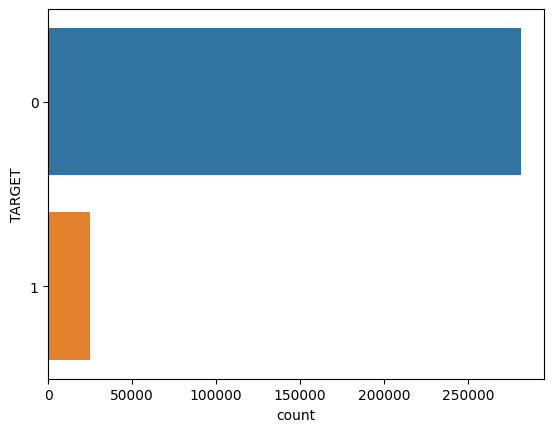

In [ ]:
# Melihat visualisasi data TARGET
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey']
categorical_summarized(train, y = 'TARGET', palette=c_palette)

Visualisasi variabel TARGET memperlihatkan pelanggan dengan kesulitan pembayaran sebanyak 24753 pelanggan lebih sedikit dibandingkan kasus lainnya sebanyak 281445

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


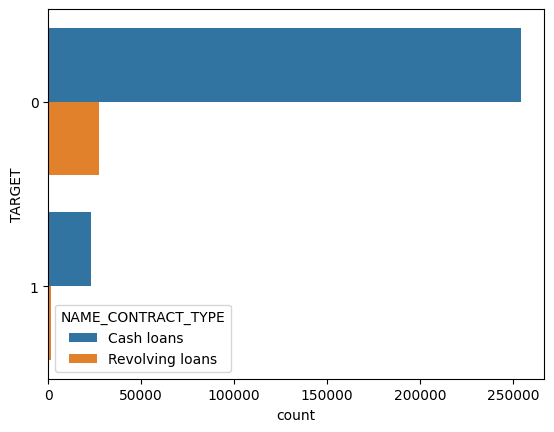

In [ ]:
# Feature variable: NAME_CONTRACT_TYPE
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey', 'tab:pink']
categorical_summarized(train, y = 'TARGET', hue='NAME_CONTRACT_TYPE', palette=c_palette)

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


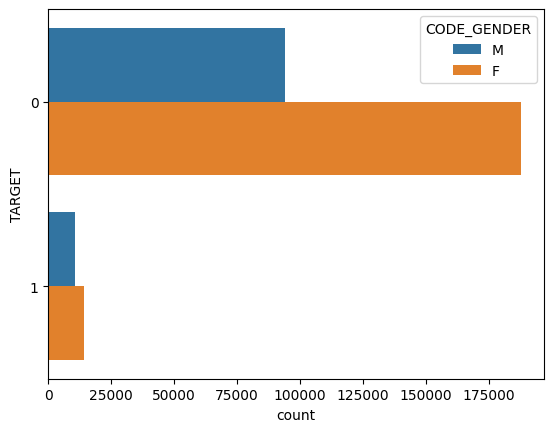

In [ ]:
# Feature variable: CODE_GENDER
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey', 'tab:pink']
categorical_summarized(train, y = 'TARGET', hue='CODE_GENDER', palette=c_palette)

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


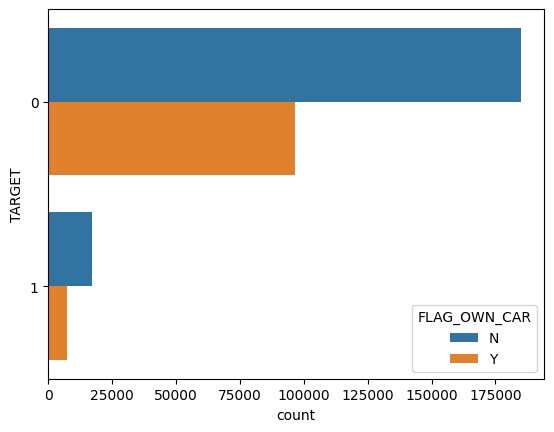

In [ ]:
# Feature variable: FLAG_OWN_CAR
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey', 'tab:pink']
categorical_summarized(train, y = 'TARGET', hue='FLAG_OWN_CAR', palette=c_palette)

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


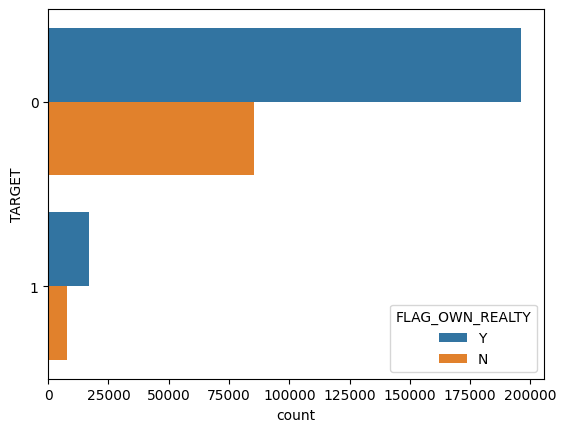

In [ ]:
# Feature variable: FLAG_OWN_REALTY
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey', 'tab:pink']
categorical_summarized(train, y = 'TARGET', hue='FLAG_OWN_REALTY', palette=c_palette)

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


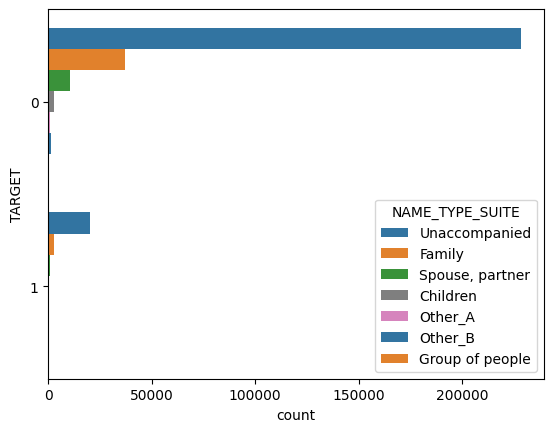

In [ ]:
# Feature variable: NAME_TYPE_SUITE
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey', 'tab:pink']
categorical_summarized(train, y = 'TARGET', hue='NAME_TYPE_SUITE', palette=c_palette)

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


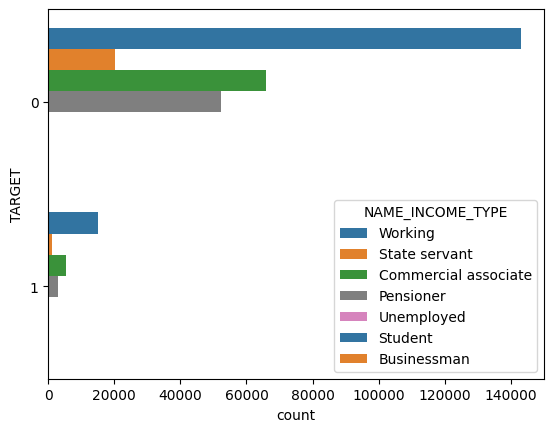

In [ ]:
# Feature variable: NAME_INCOME_TYPE
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey', 'tab:pink']
categorical_summarized(train, y = 'TARGET', hue='NAME_INCOME_TYPE', palette=c_palette)

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


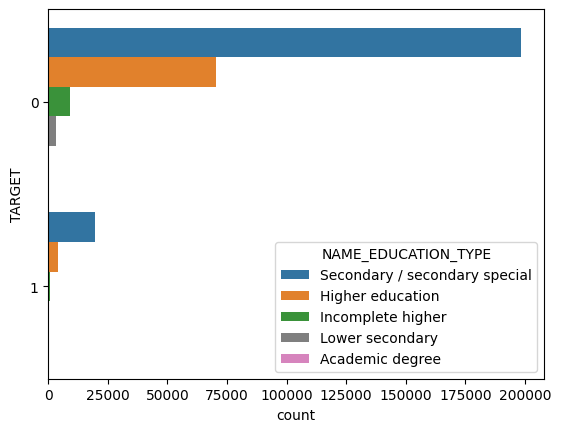

In [ ]:
# Feature variable: NAME_EDUCATION_TYPE
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey', 'tab:pink']
categorical_summarized(train, y = 'TARGET', hue='NAME_EDUCATION_TYPE', palette=c_palette)

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


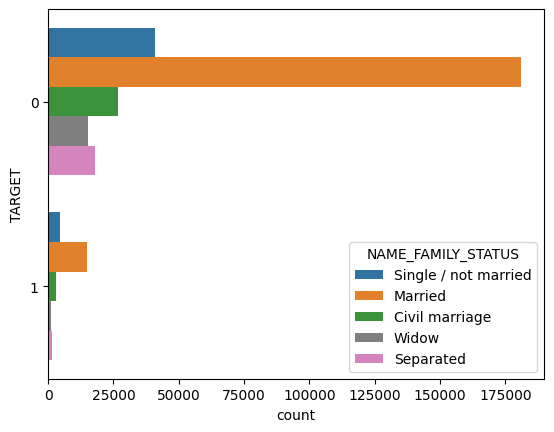

In [ ]:
# Feature variable: NAME_FAMILY_STATUS
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey', 'tab:pink']
categorical_summarized(train, y = 'TARGET', hue='NAME_FAMILY_STATUS', palette=c_palette)

count    306198.000000
mean          0.080840
std           0.272589
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
mode:  0    0
Name: TARGET, dtype: int64
0    281445
1     24753
Name: TARGET, dtype: int64


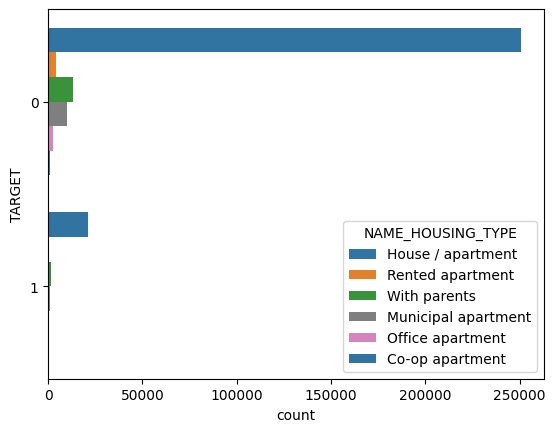

In [ ]:
# Feature variable: NAME_HOUSING_TYPE
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey', 'tab:pink']
categorical_summarized(train, y = 'TARGET', hue='NAME_HOUSING_TYPE', palette=c_palette)

**Correlation Matrix**

<Axes: >

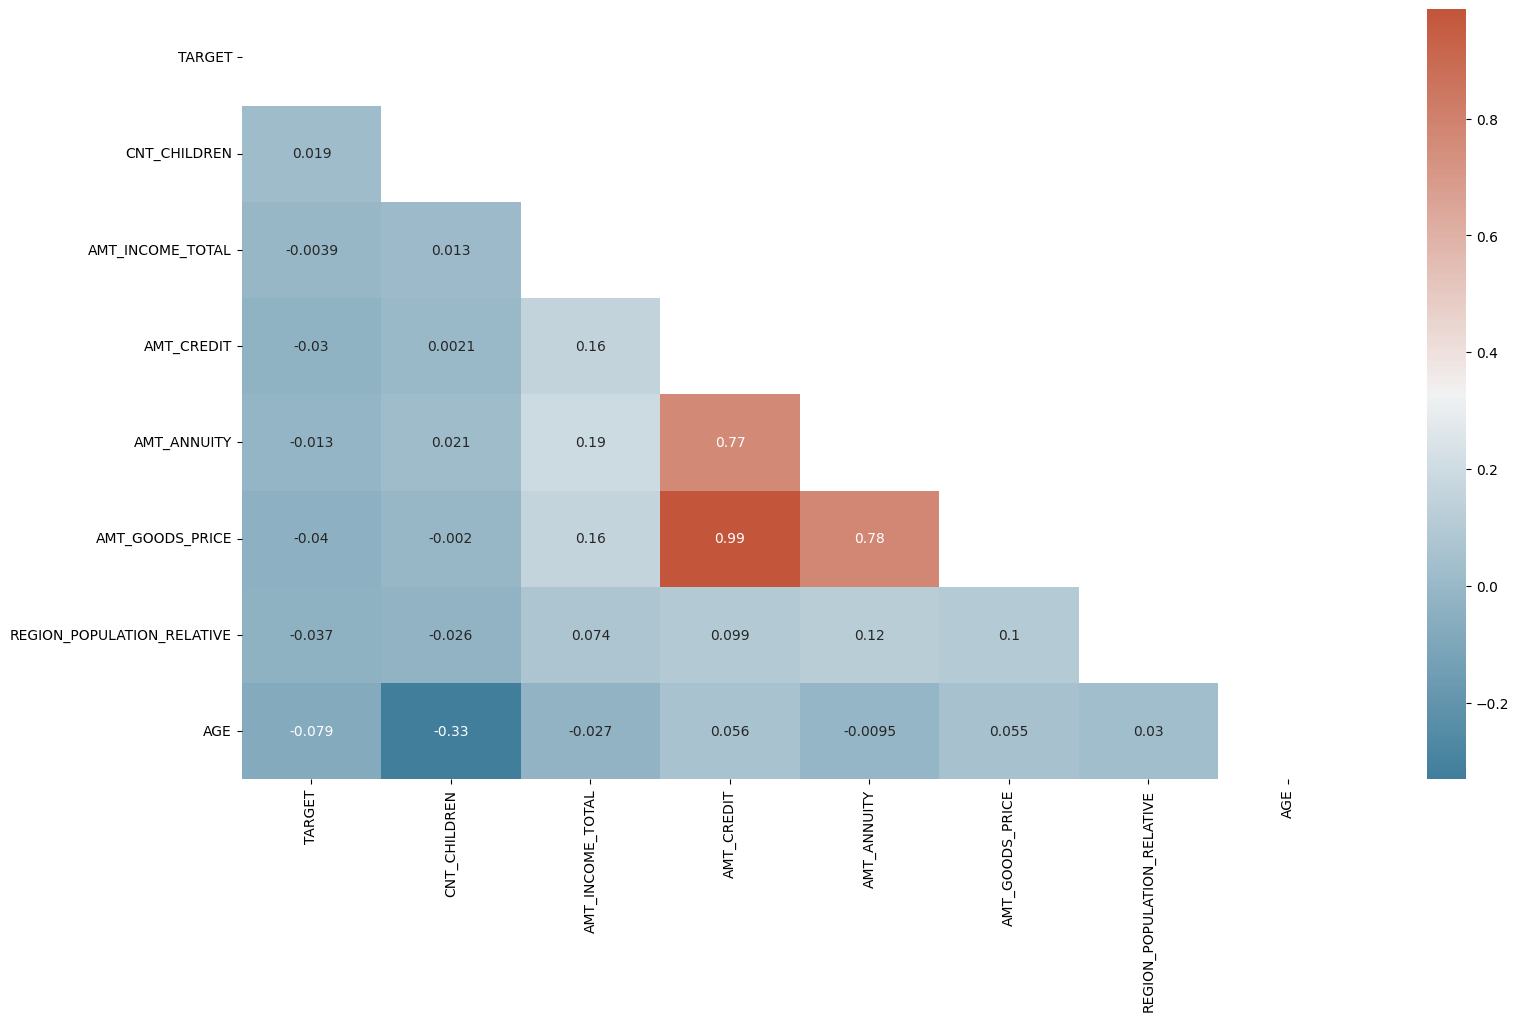

In [ ]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns

# Correlation between different variables
#
corr = train.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(18, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Berdasarkan tabel korelasi diatas menunjukkan variabel CNT_CHILDREN, ANT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, dan AGE memiliki nilai korelasi yang rendah terhadap variabel TARGET.

**Pemilihan jenis variabel data dan Split Data**

Split data 75% untuk training dan 25% untuk testing

In [ ]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(train.drop(['TARGET'],axis=1))
Y = train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=60)
print ('Train set:', X_train.shape, y_train.shape )
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (229648, 45) (229648,)
Test set: (76550, 45) (76550,)


In [ ]:
X

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,1,0,0,...,0,1,0,0,0,0,0,0,0,1
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1,0,1,...,0,0,0,1,0,1,0,0,0,0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,1,0,1,...,0,1,0,0,0,1,0,0,0,0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,32,1,0,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
Y[:5]

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

# MODELLING

Pada tahap modelling, digunakan dua macam metode yaitu:

*   Logistic Regression
*   Random Forest Classifier

Hyperparameter tuning yang digunakan adalah Random Search CV.

**Random Search**

Random search mirip dengan grid search, tetapi alih-alih menggunakan semua titik di kisi, ini hanya menguji subset yang dipilih secara acak dari titik-titik ini. Semakin kecil subset ini, semakin cepat tetapi kurang akurat pengoptimalan. Semakin besar kumpulan data ini, semakin akurat pengoptimalan tetapi semakin mendekati grid seaarch.

## Logistic Regression

In [ ]:
#Import the library
from sklearn.linear_model import LogisticRegression

In [ ]:
#Modelling
LR = LogisticRegression(C=0.01, solver='liblinear', class_weight='balanced').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [ ]:
pred_nb = LR.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print(metrics.accuracy_score(y_test, pred_nb)*100)
print(confusion_matrix(y_test, pred_nb))
print(classification_report(y_test, pred_nb))

64.04310907903331
[[45998 24427]
 [ 3098  3027]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     70425
           1       0.11      0.49      0.18      6125

    accuracy                           0.64     76550
   macro avg       0.52      0.57      0.47     76550
weighted avg       0.87      0.64      0.72     76550



Hasil klasifikasi Logistic Regression, nilai akurasi data testing 0.64 atau 64%. Nilai pelanggan yang actual kesulitan pembayaran sebesar 3027 yang lebih kecil dari nilai pelanggan yang diprediksi kesulitan pembayaran padahal tidak sebesar 3098. Maka, model Logistic Regression kurang tepat digunakan untuk prediksi sebab tingkat kepercayaannya dibawah 80%.

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 2nd Algorithm: Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, pred_rf)*100)
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

91.97256694970606
[[70397    28]
 [ 6117     8]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70425
           1       0.22      0.00      0.00      6125

    accuracy                           0.92     76550
   macro avg       0.57      0.50      0.48     76550
weighted avg       0.86      0.92      0.88     76550



Hasil klasifikasi Random Forest Classifier, nilai akurasi data testing 0.92 atau 92%. Maka, model Random Forest Classifier sangat tepat digunakan untuk prediksi sebab tingkat kepercayaannya diatas 80%.

In [ ]:
rf.feature_importances_

array([3.29514830e-02, 1.25083669e-01, 1.31544134e-01, 1.54769815e-01,
       1.01991138e-01, 1.39680455e-01, 1.26738503e-01, 2.21865519e-03,
       2.22596977e-03, 3.93011560e-03, 4.15518730e-03, 6.32803811e-03,
       6.24279838e-03, 1.23945327e-02, 1.24941656e-02, 2.14848437e-03,
       9.73764909e-03, 4.12718731e-04, 1.17728658e-03, 1.94243038e-03,
       4.96901170e-03, 1.11093687e-02, 7.41802092e-08, 8.72813561e-03,
       3.80860327e-03, 4.53296285e-03, 3.57941468e-06, 1.82489495e-04,
       9.39207536e-03, 5.81330662e-05, 4.41292770e-03, 3.35754789e-03,
       2.27352959e-03, 5.89885583e-03, 8.42816499e-03, 1.16569175e-02,
       6.83607066e-03, 9.34552082e-03, 3.61458370e-03, 1.10254312e-03,
       7.32407084e-03, 4.48021145e-03, 1.74329764e-03, 3.44101192e-03,
       5.13308348e-03])

Faktor-faktor yang mempengaruhi kesulitan pembayaran pada pelanggan

<Axes: >

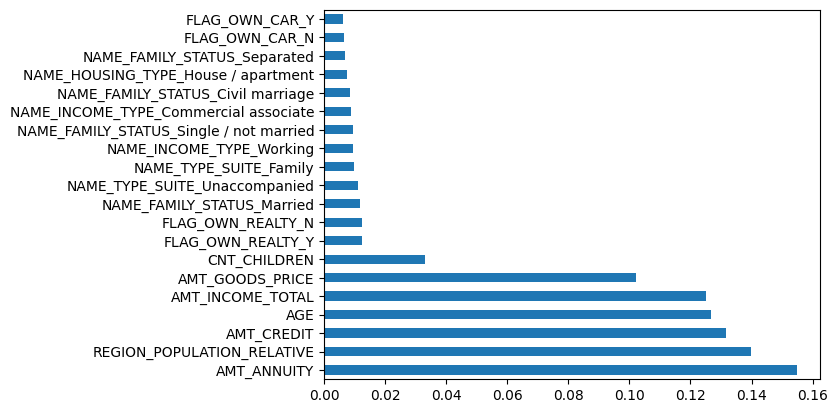

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

Berdasarkan diagram Faktor kesulitan pembayaran pada Pelanggan dengan menggunakan metode Random Forest Classifier, 3 faktor yang sangat mempengaruhi, yaitu:
1. AMT_ANNUITY (Anuitas Pinjaman) 15,5%
2. REGION_POPULATION_RELATIVE (Populasi wilayah tempat tinggal pelanggan) 13,9%
3. AMT_CREDIT (Jumlah kredit dari pinjeman) 13,2%

# REKOMENDASI

Dari analisis yang telah dilakukan untuk melihat penyebab kesulitan pelanggan dalam pembayaran pinjaman pada perusahaan Home Credit Indonesia, maka rekomendasi yang dapat diberikan kepada perusahaan adalah:

1. Home Credit Indonesia sebaiknya memberikan keringanan batas waktu pembayaran, anuitas pinjaman yang lebih kecil, atau peningkatan batas pinjaman berdasarkan penghasilan pelanggan.
2. Dalam mempertahankan pelanggan yang tidak berpotensi mengalami kesulitan pembayaran dengan memberi perhatian khusus pada pelanggan dengan tipe pinjaman cash loans, sedang bekerja, sudah manikah, dan memiliki rumah atau apartment.
3. Klasifikasi model dengan metode balancing dataset (SMOTE) agar hasil prediksi semakin akurat, sebab jumlah pelanggan yang tidak mengalami kesulitan pembayaran lebih banyak dibandingkn yang mengalami kesulitan pembayaran. Maka dataset dapat dikatakan unstable.

# Link Github

https://github.com/Faradillahtsalits10/Home-Credit-Indonesia